In [1]:
#Importing the libraries that are requried
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [2]:
#Importing the dataset
dataset = pd.read_csv('C:/Users/Nagendra/Documents/50_Startups.csv')

In [3]:
#Analyzing the data
dataset.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
#Numerical/Statistical analysis of the dataset
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [5]:
#Dimensions of dataset
print('There are ',dataset.shape[0],'rows and ',dataset.shape[1],'columns in the dataset.')

There are  50 rows and  4 columns in the dataset.


In [6]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [7]:
#Check for NULL values
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [8]:
#Schema of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [9]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


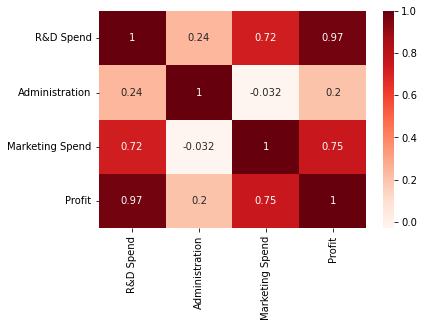

In [10]:
#Correlation matrix
sns.heatmap(c,annot=True,cmap='Reds')
plt.show()

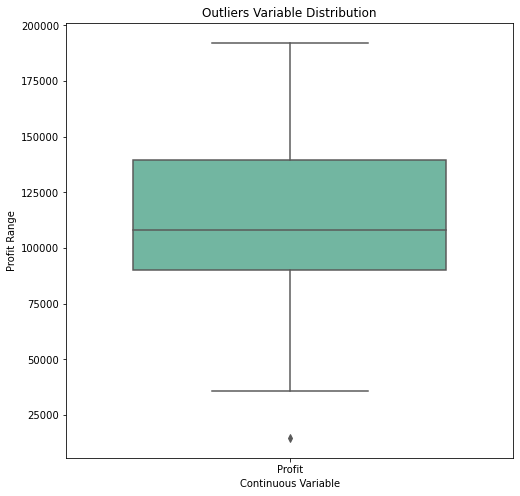

In [11]:
#Outliers detection in the target variable
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

C:\Users\Nagendra\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


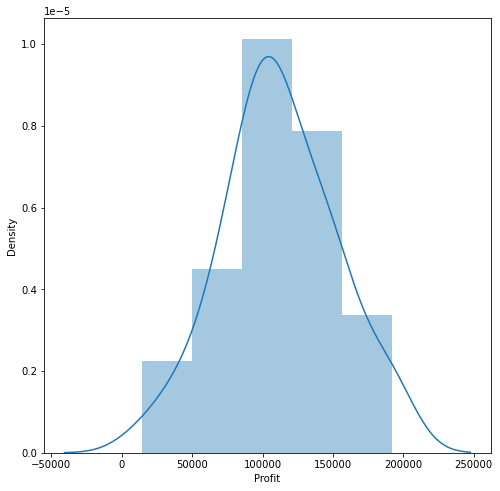

In [12]:
#Histogram on Profit
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

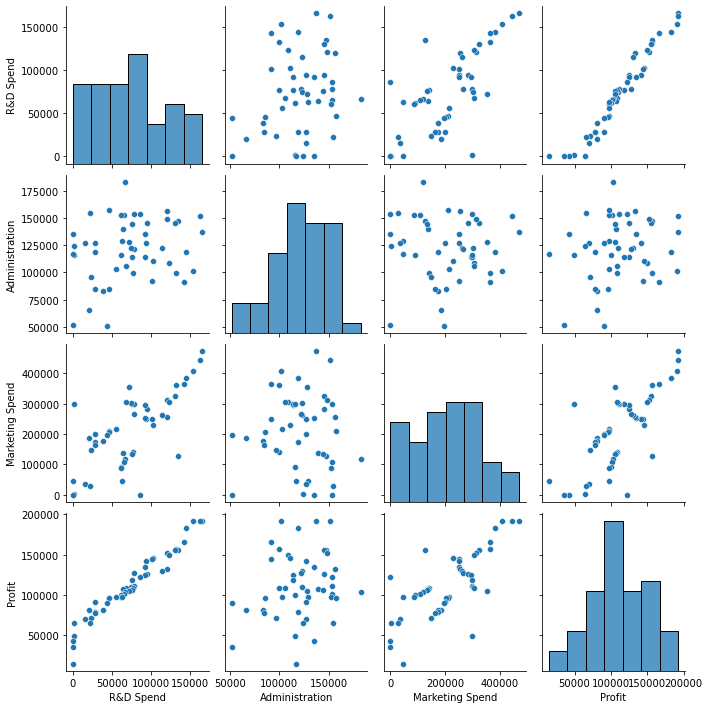

In [13]:
#Pair plot
sns.pairplot(dataset)
plt.show()

In [14]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [15]:
#Imporing the Label Encoder 
from sklearn.preprocessing import LabelEncoder

In [16]:
#Encode labels with values between 0 and n_classes-1
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


In [17]:
#split the data into training and testing data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=0)
x_train

array([[5.5493950e+04, 1.0305749e+05, 2.3000000e+01],
       [4.6014020e+04, 8.5047440e+04, 2.1000000e+01],
       [7.5328870e+04, 1.4413598e+05, 1.1000000e+01],
       [4.6426070e+04, 1.5769392e+05, 2.2000000e+01],
       [9.1749160e+04, 1.1417579e+05, 3.2000000e+01],
       [1.3029813e+05, 1.4553006e+05, 4.0000000e+01],
       [1.1994324e+05, 1.5654742e+05, 2.8000000e+01],
       [1.0002300e+03, 1.2415304e+05, 1.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 8.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.9000000e+01],
       [6.1994480e+04, 1.1564128e+05, 7.0000000e+00],
       [6.3408860e+04, 1.2921961e+05, 5.0000000e+00],
       [7.8013110e+04, 1.2159755e+05, 3.0000000e+01],
       [2.3640930e+04, 9.6189630e+04, 1.4000000e+01],
       [7.6253860e+04, 1.1386730e+05, 3.4000000e+01],
       [1.5505730e+04, 1.2738230e+05, 3.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.9000000e+01],
       [9.1992390e+04, 1.354

In [18]:
#Trail the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [19]:
#Testing the model using the predict function
y_pred = model.predict(x_test)
y_pred

array([103216.65296382, 132415.34752948, 133609.85576218,  72187.403693  ,
       179517.57329316, 114958.52100821,  66447.06770271,  97796.98187693,
       115014.7123948 , 169803.61146748])

In [20]:
#Comparing the predicted values and actual values
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,103216.652964,103282.38
1,132415.347529,144259.40
2,133609.855762,146121.95
3,72187.403693,77798.83
4,179517.573293,191050.39
5,114958.521008,105008.31
6,66447.067703,81229.06
7,97796.981877,97483.56
8,115014.712395,110352.25
9,169803.611467,166187.94


In [21]:
#Checking model accuracy
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 93.39397712011362


In [22]:
#Confusion matrix
#from sklearn.metrics import confusion_matrix
#cm=confusion_matrix(y_test,y_pred)